In [5]:
from time import sleep
from ctypes import c_int, byref
import libximc as ximc
import serial
import pandas
import numpy as np
from IPython import display
import matplotlib.pyplot as plt

def open_serial(port, baudrate=None):
    if baudrate == None:
        try:
            return serial.Serial(port)
        except Exception as e:
            print(e)
            return None
    else:
        try:
            return serial.Serial(port, baudrate)
        except Exception as e:
            print(e)
            return None
        
def close_serial(*devices):
    for device in devices:
        try:
            device.close()
        except Exception as e:
            print(e)

def read_power(powermeter_device, TEST=False):
    if TEST:
        # заглушка для тестирования
        return np.random.random()
    else:
        try:
            powermeter_device.write(b'*CVU')
            return powermeter_device.readline().decode().strip()
            # print(powermeter_device.readline().decode().strip())
        except Exception as e:
            print(e)
            return None

In [6]:
def maestro_measure():

    maestro = open_serial('COM5', 115200)

    temp = read_power(maestro)

    close_serial(maestro)

    return temp

In [7]:
def spinner_step(x):
    
    device_uri = "xi-com:\\\\.\\COM3"
    device_id = ximc.lib.open_device(device_uri.encode())

    ximc.lib.command_movr(device_id, x, 0)

    ximc.lib.close_device(byref(c_int(device_id)))

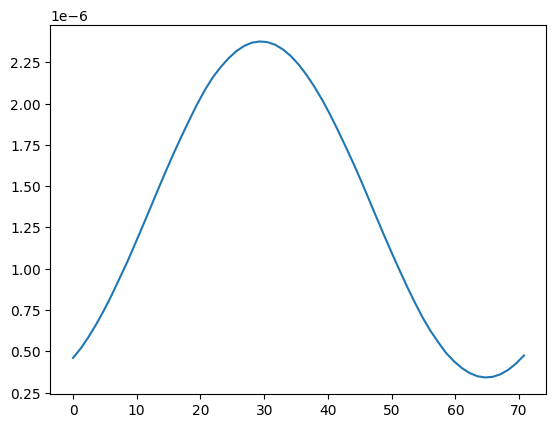

71.98 5.30492e-07


In [8]:
data = pandas.DataFrame(columns = ['angle', 'power'])

for i in range(0, 60):

    display.clear_output(wait=True)

    plt.plot(data['angle'], data['power'])
    plt.show()

    spinner_step(250)

    sleep(2)

    temp = float(maestro_measure())

    sleep(2)

    if np.log10(temp) < 38:

        print(i*1.22, temp)

        data.loc[i, 'angle'] = i * 1.22
        data.loc[i, 'power'] = temp

filename = 'result_10_07_2023'
data.to_csv(filename + '_4.csv', index=False)


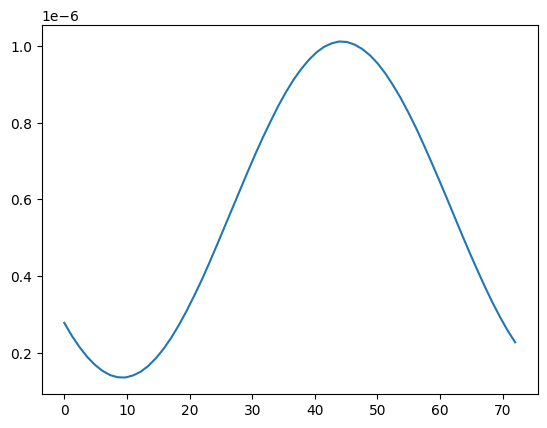

In [15]:
toplot = pandas.read_csv('призма + зеркало + лямбда 10_07_2023.csv')
plt.plot(toplot['angle'], toplot['power'])
plt.show()